---
# Cairo University Faculty of Engineering
## Machine Learning
## Assignment 2

---

Please write your full name here
- **Name** : "Mourad Magdy"

## Part 1 Simulated Data

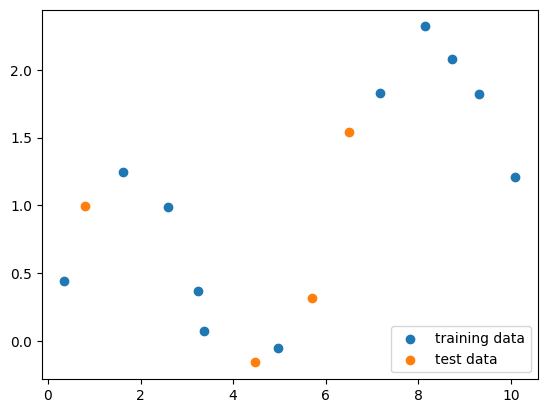

In [ ]:
%matplotlib notebook
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)


plt.figure()
plt.scatter(X_train, y_train, label='training data')
plt.scatter(X_test, y_test, label='test data')
plt.legend(loc=4);

### Question 1.1
- Write a function that fits a polynomial LinearRegression model on the training data X_train for degrees **1, 2, 3, 6, and 9**. (Use `PolynomialFeatures` in `sklearn.preprocessing` to create the polynomial features and then fit a linear regression model)
- For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. np.linspace(0,10,100)) and store this in a numpy array.
- The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 2, the third row degree 3, the fourth row degree 6, and the fifth row degree 9.

In [ ]:
def answer_one():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    degrees=[1,2,3,6,9]
    predictions=np.zeros((len(degrees),100))
    for i,degree in enumerate(degrees):
      polynomial_degree=PolynomialFeatures(degree=degree)
      X_train_polynomial=polynomial_degree.fit_transform(X_train.reshape(-1,1))
      X_test_polynomial=polynomial_degree.transform(np.linspace(0,10,100).reshape(-1,1))
      linear_regression=LinearRegression().fit(X_train_polynomial,y_train)
      predictions[i,:]=linear_regression.predict(X_test_polynomial)
    return predictions # results

In [ ]:
results = answer_one()
print(results.shape)

(5, 100)


In [ ]:
print(results)

[[ 2.53040195e-01  2.69201547e-01  2.85362899e-01  3.01524251e-01
   3.17685603e-01  3.33846955e-01  3.50008306e-01  3.66169658e-01
   3.82331010e-01  3.98492362e-01  4.14653714e-01  4.30815066e-01
   4.46976417e-01  4.63137769e-01  4.79299121e-01  4.95460473e-01
   5.11621825e-01  5.27783177e-01  5.43944529e-01  5.60105880e-01
   5.76267232e-01  5.92428584e-01  6.08589936e-01  6.24751288e-01
   6.40912640e-01  6.57073992e-01  6.73235343e-01  6.89396695e-01
   7.05558047e-01  7.21719399e-01  7.37880751e-01  7.54042103e-01
   7.70203454e-01  7.86364806e-01  8.02526158e-01  8.18687510e-01
   8.34848862e-01  8.51010214e-01  8.67171566e-01  8.83332917e-01
   8.99494269e-01  9.15655621e-01  9.31816973e-01  9.47978325e-01
   9.64139677e-01  9.80301028e-01  9.96462380e-01  1.01262373e+00
   1.02878508e+00  1.04494644e+00  1.06110779e+00  1.07726914e+00
   1.09343049e+00  1.10959184e+00  1.12575320e+00  1.14191455e+00
   1.15807590e+00  1.17423725e+00  1.19039860e+00  1.20655995e+00
   1.22272

### Fitted model plot

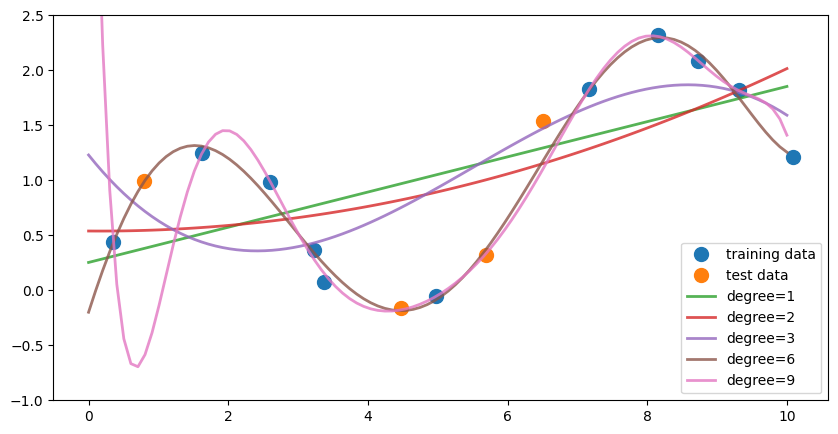

In [ ]:
def plot_one(degree_predictions):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,2,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plot_one(answer_one())

### Question 1.2
Comment on the figure above in 2 lines in terms of fitting the data.

**ANSWER**

As the number of degrees increase the more the  model overfits the data so it will not perform well on unseen data.

### Question 2
- Write a function that fits a polynomial `LinearRegression` model on the training data `X_train` for degrees 0 through 9. For each model compute the $R^2$ regression score on the **training data** as well as the the **test data**, and return both of these arrays in a tuple.

- *This function should return one tuple of numpy arrays `(r2_train, r2_test)`. Both arrays should have shape `(10,)`*

In [ ]:
def answer_two():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics import r2_score
    r2_train,r2_test=np.zeros(10),np.zeros(10)
    for degree in range(10):
      polynomial_degree=PolynomialFeatures(degree=degree)
      X_train_polynomial=polynomial_degree.fit_transform(X_train.reshape(-1,1))
      X_test_polynomial=polynomial_degree.transform(X_test.reshape(-1,1))

      linear_regression=LinearRegression().fit(X_train_polynomial,y_train)
      y_train_prediction=linear_regression.predict(X_train_polynomial)
      y_test_prediction=linear_regression.predict(X_test_polynomial)

      r2_train[degree]=r2_score(y_train,y_train_prediction)
      r2_test[degree]=r2_score(y_test,y_test_prediction)

    return (r2_train,r2_test)# answer here

In [ ]:
results = answer_two()
print(results[0].shape,results[1].shape)

(10,) (10,)


In [ ]:
print(results)

(array([0.        , 0.42924578, 0.4510998 , 0.58719954, 0.91941945,
       0.97578641, 0.99018233, 0.99352509, 0.99637545, 0.99803706]), array([-0.47808642, -0.45237104, -0.06856984,  0.00533105,  0.73004943,
        0.87708301,  0.9214094 ,  0.92021504,  0.63247948, -0.64525365]))


### Question 3
- Plot $R^2$ scores at degrees from 0 to 9 for both training and testing data on the same plot.

- The plot must contain a legend and appropriate names for the axes.

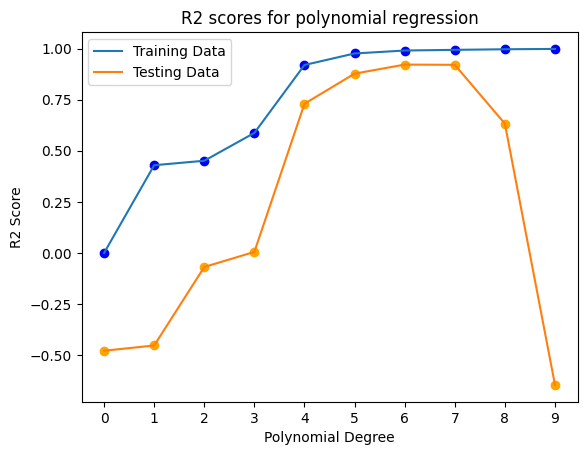

In [ ]:
degrees=[0,1,2,3,4,5,6,7,8,9]
plt.plot(degrees,results[0],label='Training Data')
plt.plot(degrees,results[1],label='Testing Data')
plt.scatter(degrees, results[0], color='blue')
plt.scatter(degrees, results[1], color='orange')
plt.xlabel('Polynomial Degree')
plt.ylabel('R2 Score')
plt.title('R2 scores for polynomial regression')
plt.xticks(degrees,degrees)
plt.legend()
plt.show()

Based on the $R^2$ scores (degree levels 0 through 9), what degree level corresponds to a model that is **underfitting**? What degree level corresponds to a model that is **overfitting**? What choice of degree level would provide a model with **good generalization** performance on this dataset?

**ANSWER**
- underfitting is indicated by low R2 scores for both training and testing data.

- overfitting is indicated by high R2 score for training data but low R2 for testing data.

- Good generalization is indicated by high R2 scores for both the training and testing data.

- Degree levels from 4=>7 is able to generalize well.
- overfitting =>  9 however the accuracy began to drop at 8

- underfitting => from 0 to 4

### Question 4

- Training models on high degree polynomial features can result in overly complex models that overfit, so we often use regularized versions of the model to constrain model complexity, as we saw with Ridge and Lasso linear regression.

- For this question, train three models: a non-regularized LinearRegression model (default parameters) and a regularized Lasso Regression model (with parameters `alpha=0.01`, `max_iter=10000`), and a regularized Ridge Regression model (with parameters `alpha=0.01`, `max_iter=10000`) both on polynomial features of degree 50.
- Return the $R^2$ score for both the LinearRegression, Lasso, Ridge model's test sets.


*This function should return one tuple `(LinearRegression_R2_test_score, Lasso_R2_test_score, Ridge_R2_test_score)`*

In [ ]:
def answer_four():
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import Lasso,Ridge, LinearRegression
    from sklearn.metrics import r2_score
    Polynomial_degree=PolynomialFeatures(degree=50)
    X_train_polynomial=Polynomial_degree.fit_transform(X_train.reshape(-1,1))
    X_test_polynomial=Polynomial_degree.transform(X_test.reshape(-1,1))

    linear_regression=LinearRegression().fit(X_train_polynomial,y_train)
    y_test_prediction=linear_regression.predict(X_test_polynomial)
    LinearRegression_R2_test_score=r2_score(y_test,y_test_prediction)

    lasso_regression=Lasso(alpha=0.01,max_iter=10000)
    lasso_regression.fit(X_train_polynomial,y_train)
    y_test_prediction=lasso_regression.predict(X_test_polynomial)
    Lasso_R2_test_score=r2_score(y_test,y_test_prediction)

    Ridge_regression=Ridge(alpha=0.01,max_iter=10000)
    Ridge_regression.fit(X_train_polynomial,y_train)
    y_test_prediction=Ridge_regression.predict(X_test_polynomial)
    Ridge_R2_test_score=r2_score(y_test,y_test_prediction)


    return (LinearRegression_R2_test_score, Lasso_R2_test_score, Ridge_R2_test_score) # results


In [ ]:
results = answer_four()
print(results)

(0.006953559711665225, 0.8493908995296351, -0.08938086200465722)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.140e-01, tolerance: 6.895e-04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


**Comment on the results**
- which is better?


- what's the difference between the models in results and data fit?

- how do the weight values differ between the models?



**ANSWER**

1) Lasso regression model performed the best with R2 score equal to 0.84(explaining 84.9% of the variance in the data)

 Linear regression model performed the worst with R2 score equal to 0.006

 Ridge regression performed bad with R2 score of -0.089 => the negative means that the model fits data worse than a horizontal line.

 2)Lasso regression model performed better than the linear and ridge regression models, it has the best fit to the data

 Linear regression is not regularized like lasso and ridge regression so it is more prone to overfitting

 Ridge regression is regularized but doesnot shrink the irrelevant features to zero like the lasso regression so it has more accuracy than linear regression but less than lasso regression

 3) lasso can shrink some features if they are irrelevant to zero which is good in training the model, it adds L1 penalty term

 Ridge shrinks some features close to zero but not zero , it add L2 penalty term

 Linear isn't regularized(doesnot have penalty term) so it can lead to large weight values which can result in overfitting

### Question 5
Write a function to calculate the total mean square error.
$$
MSE = E[ (ytrue  - yhat)^2 ]
$$

**Then compare your results with scikit-learn implementation of mean square error on the example provided below:**

In [ ]:
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

In [ ]:
def mse(y_true, y_pred):
    ########### write code here #############
    total_mse=[]
    for i in range(len(y_true)):
      total_mse.append((y_true[i]-y_pred[i])**2)
    error=sum(total_mse)/len(y_true)
    return error

In [ ]:
# comparison code
from sklearn.metrics import mean_squared_error
sklearn_mse=mean_squared_error(y_true,y_pred)
result_mourad_implementation=mse(y_true,y_pred)
print(result_mourad_implementation,sklearn_mse)
# the results of my implementation and scikit learn are the same

0.375 0.375


### Question 6
Implement a linear regression class **FROM SCRATCH** that can be used by one of the following three options (according to user's choice):
1. Ordinary Linear Regression Class
2. Implement Ridge Regression Class
3. Implement Lasso Regression Class

- Can use numpy
- Complete the missing code

**Help**

The gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w_k := w_k -  \alpha \frac{\partial J(w,b)}{\partial w_k} \tag{1}  \; &
\newline & \rbrace\end{align*}$$

where, parameters $w, b$ are both updated simultaniously and where for **LINEAR REGRESSION**
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{n} \sum\limits_{i = 0}^{n-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(w,b)}{\partial w_k}  = \frac{1}{n} \sum\limits_{i = 0}^{n-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)}_k \tag{3}
$$
    
*  $f_{w,b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$, is the target value


You will implement a function called `update_weights` which calculates $\frac{\partial J(w)}{\partial w_k}$, $\frac{\partial J(w)}{\partial b}$ for each type of regression --> different gradients for each type


For example for **Linear Regression**, the `updat_weights` function should:

* Iterate over the training examples, and for each example, compute:
    * The prediction of the model for that example
    $$
    f_{wb}(x^{(i)}) =  \sum_{k=1}^{k=m}w_kx^{(i)} + b
    $$
   
    * Loop over features $k$ and calculate the gradient for each parameter $w_k$
        $$
        \frac{\partial J(w,b)}{\partial w_k}^{(i)}  =  (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)}_k
        $$
    * Then for $b$ from that example
        $$
        \frac{\partial J(w,b)}{\partial b}^{(i)}  =  (f_{w,b}(x^{(i)}) - y^{(i)})
        $$

* Calculate the total gradient update from all the examples for each parameter $w_k$ and $b$
    $$
    \frac{\partial J(w,b)}{\partial b}  = \frac{1}{n} \sum\limits_{i = 0}^{n-1} \frac{\partial J(w,b)}{\partial b}^{(i)}
    $$
    
    $$
    \frac{\partial J(w,b)}{\partial w_k}  = \frac{1}{n} \sum\limits_{i = 0}^{n-1} \frac{\partial J(w,b)}{\partial w_k}^{(i)}
    $$
  * Here, $n$ is the number of training examples and $\sum$ is the summation operator

* Then update weights

In [ ]:
import numpy as np

# Linear Regression

class LinearRegression() :

    def __init__( self, learning_rate, iterations, type="linear" , reg_parameter = 0) :
        """
        This function initializes the object instance with arguments learning_rate, number of iterations, and whether to use linear or ridge or lasso
        reg_paramter is lambda for regularized regression"""

        self.learning_rate =learning_rate

        self.iterations =iterations

        self.type = type

        self.lam =reg_parameter

    def fit( self, X, Y ) :
        X=X.reshape(-1,1)
        self.m, self.n =X.shape[0],X.shape[1]

        # weight initialization, initialize w to random numbers from a uniform distribution over [0,1(
        # self.W =np.random.rand(self.n)
        self.W=np.random.uniform(0,1,self.n)
        # intialize b to 0

        self.b =0

        self.X =X

        self.Y =Y

        # gradient descent learning

        for i in range( self.iterations ) :

            self.update_weights()

        return self

    def update_weights( self ) :

        Y_pred = self.predict( self.X )

        #calculate gradients
        if self.type == 'linear':
            dW =(1/self.m)*np.dot((Y_pred-self.Y),self.X)*2

            db =(1/self.m)*np.sum(Y_pred-self.Y)*2

        elif self.type == 'ridge':
            dW =(1/self.m)*2*(np.dot((Y_pred-self.Y),self.X)+self.lam*self.W)

            db =(1/self.m)*np.sum(Y_pred-self.Y)*2
        else:
            dW =(1/self.m)*(2*np.dot((Y_pred-self.Y),self.X)+self.lam*np.sign(self.W))

            db =(1/self.m)*np.sum(Y_pred-self.Y)*2
        # if self.type == 'linear':

        #   dW = (np.dot((Y_pred-self.Y),self.X)*2)/len(self.Y)

        #   db = (np.sum(Y_pred-self.Y)*2)/len(self.Y)

        # elif self.type == 'ridge':
        #     dW = (-2 * np.dot(self.X.T, (self.Y - Y_pred))  + 2 * self.lam * self.W)/self.m
        #     db = -2 * np.sum(self.Y - Y_pred) / self.m

        # else:
        #     dW = -2 * np.dot(self.X.T, (self.Y - Y_pred)) / self.m + self.lam * np.sign(self.W)/self.m
        #     db = -2 * np.sum(self.Y - Y_pred) / self.m

        # update weights
        self.W -=self.learning_rate*dW

        self.b =self.learning_rate*db

        # you don't need to return w and b
        return self

    def predict( self, X ) :
        if self.type == 'linear':
            y_pred =np.dot(X,self.W)+self.b
        elif self.type == 'ridge':
            y_pred =np.dot(X,self.W)+self.b

        else:
            y_pred =np.dot(X,self.W)+self.b
        return y_pred

- **Train your 3 models on the simulated train data provided at the beginning of the assignment**
- use alpha = 0.01, learning_rate = 0.01, iterations, 500

In [ ]:
# Your code here
alpha=0.01
learning_rate=0.01
iterations=500
linear_regression=LinearRegression(learning_rate,iterations)
linear_regression.fit(X_train,y_train)

ridge_regression=LinearRegression(learning_rate,iterations,'ridge',alpha)
ridge_regression.fit(X_train,y_train)

lasso_regression=LinearRegression(learning_rate,iterations,'lasso',alpha)
lasso_regression.fit(X_train,y_train)

- **Test your 3 models on the simulated test data provided at the beginning of the assignment**
- **Print the MSE for each model**

In [ ]:
# Your code here
y_predict_linear_regression=linear_regression.predict(X_test.reshape(-1,1))
y_predict_ridge_regression=ridge_regression.predict(X_test.reshape(-1,1))
y_predict_lasso_regression=lasso_regression.predict(X_test.reshape(-1,1))
from sklearn.metrics import mean_squared_error
mse_linear=mean_squared_error(y_test,y_predict_linear_regression)
mse_ridge=mean_squared_error(y_test,y_predict_ridge_regression)
mse_lasso=mean_squared_error(y_test,y_predict_lasso_regression)
print(mse_linear,mse_ridge,mse_lasso)

0.6162757513565101 0.6162610304899387 0.6162379237900699


---
# Part 2 - Diabetes Data

For this assignment, you will be using the [Diabetes](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset) dataset to create a regression model that can help diagnose patients' disease progression one year after baseline.


## Question 1 (1 point)

Load Diabetes Dataset from [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn-datasets-load-diabetes)

The following function MUST:
1. Load diabetes dataset from scikit-learn as a scikit-learn bunch object which is similar to a dictionary
    - Use `scaled= False`
2. Convert the diabetes data to a pandas dataframe
3. Return a pandas dataframe with:
    - **CORRECT COLUMN NAMES** --> meaningful !!! i.e. NOT s1, s2, s3, ...
    - target column should be named "target"

In [ ]:
def load_data():
    """
    Return a pandas dataframe
    """
    ### BEGIN SOLUTION
    from sklearn.datasets import load_diabetes
    diabetes_data=load_diabetes(as_frame=True,scaled=False)
    df=diabetes_data.frame
    df.columns=['age','sex','bmi','average blood pressure','total serum cholesterol','low-density lipoproteins','high-density lipoproteins','total cholesterol / HDL','possibly log of serum triglycerides level','blood sugar level','target']
    return df


    ### END SOLUTION

In [ ]:
df = load_data()
df.head()

,age,sex,bmi,average blood pressure,total serum cholesterol,low-density lipoproteins,high-density lipoproteins,total cholesterol / HDL,possibly log of serum triglycerides level,blood sugar level,target
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


## Question 2

### 2.1

Print a data description of all columns of dataframe

use `.describe()`

In [ ]:
def range_columns(df):
    """
    Function should return the drscription of dataframe
    """
    ### BEGIN SOLUTION
    return df.describe()
    ### END SOLUTION

In [ ]:
range_columns(df)

,age,sex,bmi,average blood pressure,total serum cholesterol,low-density lipoproteins,high-density lipoproteins,total cholesterol / HDL,possibly log of serum triglycerides level,blood sugar level,target
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


### 2.2

Remove all categorical features from dataframe. Function should return the new dataframe.

In [ ]:
def drop_categorical(df):
    """
    Function should return the dataframe with categorical features removed
    """
    ### BEGIN SOLUTION
    return df.drop('sex',axis=1)
    ### END SOLUTION

In [ ]:
df = drop_categorical(df)

In [ ]:
df.head()

,age,bmi,average blood pressure,total serum cholesterol,low-density lipoproteins,high-density lipoproteins,total cholesterol / HDL,possibly log of serum triglycerides level,blood sugar level,target
0,59.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


## Question 3

Using `train_test_split`, split `X` and `y` into training and test sets. With 80% training and 10% test.

USE `random_state=0`

In [ ]:
def split(df):
    """
    Function should return X_train, X_test, y_train, y_test
    """
    ### BEGIN SOLUTION
    X=df.drop('target',axis=1)
    y=df['target']

    X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.1,train_size=0.8,random_state=0)
    return X_train, X_test, y_train, y_test
    ### END SOLUTION

In [ ]:
X_train, X_test, y_train, y_test = split(df)

## Question 5

Use scikit-learn standard scaler to standardize training data into 0 mean and 1 std.

Function must return the normalized data and the standard scaler object

In [ ]:
def standardize(data):
    """Standardize a data to 0 mean and 1 std
    Return standardized data AND the scaler object
    """
    ### BEGIN SOLUTION
    from sklearn.preprocessing import StandardScaler
    scaler=StandardScaler()
    new_data=scaler.fit_transform(data)

    return new_data, scaler
    ### END SOLUTION

In [ ]:
scaled_X_train, x_scaler = standardize(X_train)

- Apply the same transformation to the test data

In [ ]:
scaled_X_test,x_scaler = standardize(X_test)
scaled_y_test,x_scaler = standardize(y_test.values.reshape(-1,1))

## Question 6

Create a scikit-learn regression model and train it on diabetes data.
Your function should return the trained model

In [ ]:
def regression_sc(X, y):
    """Trains a linear regression model on X, y data """
    ### BEGIN SOLUTION
    from sklearn.linear_model import LinearRegression
    linear_regression=LinearRegression()
    linear_regression.fit(X,y)
    return linear_regression
    ### END SOLUTION

In [ ]:
linreg = regression_sc(scaled_X_train, y_train)
y_pred = linreg.predict(scaled_X_train)


print('linear model coeff (w): {}'.format(linreg.coef_))
print('linear model intercept (b): {:.3f}'.format(linreg.intercept_))

linear model coeff (w): [ -2.77573871  27.98180493  14.18788765 -33.42806069  20.22654595
   7.476471     5.97989434  33.15764325   3.93092881]
linear model intercept (b): 150.246


- Print the mse, and R2 score for the train data

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
mean_square_error_train=mean_squared_error(y_train,y_pred)
r2_score_train=r2_score(y_train,y_pred)
print(mean_square_error_train,r2_score_train)


2906.4228454619965 0.5091863135415371


- Print the mse, and R2 score for the test data

In [ ]:
y_pred_test=linreg.predict(scaled_X_test)
mse_test=mean_squared_error(scaled_y_test,y_pred_test)
r2_test=r2_score(scaled_y_test,y_pred_test)
print(mse_test,r2_test)



25421.16540001949 -25420.165400019494


- Comment on the results in terms of data fit
there is overfitting of the data as the mse of the test data is very large and the r2_score isnot good